In [1]:
import numpy as np 
import pandas as pd

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
# List the kaggle dataset 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tempdataset/train_label/3_train_label
/kaggle/input/tempdataset/train_label/4_train_label
/kaggle/input/tempdataset/train_label/1_train_label
/kaggle/input/tempdataset/train_label/2_train_label
/kaggle/input/tempdataset/train_label/0_train_label
/kaggle/input/tempdataset/train_data/4_train_data
/kaggle/input/tempdataset/train_data/1_train_data
/kaggle/input/tempdataset/train_data/3_train_data
/kaggle/input/tempdataset/train_data/0_train_data
/kaggle/input/tempdataset/train_data/2_train_data


In [2]:
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import KFold

def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

#normalization
def normalize(a):
    norm = (a - np.amin(a)) / (np.amax(a) - np.amin(a))
    norm = 2 * norm - 1
    print('min of array: ',np.amin(a))
    print('max of array: ',np.amax(a))
    return norm

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# imbalance distribution
# training data
imb_list = [
    4500,
    2000,
    1000,
    800,
    600,
    500,
    400,
    250,
    150,
    80, ] 

'''# imbalance data for imbalanced test
imb_list = [
    1000,
    500,
    250,
    187,
    125,
    87,
    50,
    25,
    15,
    10, ] '''

'''# balance data for balanced test
imb_list = [
    1000,
    1000,
    1000,
    1000,
    1000,
    1000,
    1000,
    1000,
    1000,
    1000, ] '''

# small training data
'''imb_list = [
    350,
    200,
    100,
    80,
    60,
    50,
    40,
    25,
    15,
    8, ] '''

# KFold Parameter
args = {}
args['k'] = 5
args['seed'] = 41

In [ ]:
# Read Input Data
path = '/kaggle/input/cifar10-tar-gz/cifar-10-batches-py'
files = os.listdir(path)
files.sort()
print(files)

file = os.path.join(path, files[1])
#file = os.path.join(path, files[7]) # for testset data
data_dict = unpickle(file)
print(data_dict.keys())

# Draw a picture
n = 356
image = data_dict[b'data'][n]
label = data_dict[b'labels'][n]
print(data_dict[b'filenames'][n])
image_cf = image.reshape(3,32,32)
print(image_cf.shape)
image_cl = np.moveaxis(image_cf, 0, -1)
print(image_cl.shape)
print(classes[label])
plt.imshow(image_cl)

In [ ]:

# Merge data array and label array

file = os.path.join(path, files[1])
#file = os.path.join(path, files[7]) # for testset data
print(file)
data_dict = unpickle(file)
data_arr = data_dict[b'data']
label_arr = np.array(data_dict[b'labels'])
print(data_arr.shape)
print(label_arr.shape)

for i in range(4):
    file = os.path.join(path, files[i+2])
    print(file)
    data_dict = unpickle(file)
    data_arr = np.append(data_arr, data_dict[b'data'], axis=0)
    label_arr = np.append(label_arr, np.array(data_dict[b'labels']), axis=0)
    
print(data_arr.shape)
print(label_arr.shape) 

# Normalize
data_arr = normalize(data_arr)

i=0
img = data_arr[i]
print('img max: ',img.max())
print('img min: ',img.min())

# Introducing Imbalance
airplanes = data_arr[label_arr == 0]
rng = np.random.default_rng()
sampling = rng.choice(airplanes, imb_list[0], replace=False, axis=0)

print(sampling.shape)

for i in range(9):
    a = data_arr[label_arr == i+1]
    a = rng.choice(a, imb_list[i+1], replace=False, axis=0)
    sampling = np.append(sampling, a, axis=0 )
    print(sampling.shape)

np.savetxt('trn_img_imb.gz', sampling)

trn_lab_imb = np.full(imb_list[0], 0, dtype=int)
print(trn_lab_imb.shape)
for i in range(9):
    a = np.full(imb_list[i+1], i+1, dtype=int)
    trn_lab_imb = np.append(trn_lab_imb, a, axis=0)
    print(trn_lab_imb.shape)

np.savetxt('trn_lab_imb.gz', trn_lab_imb)
print('Done.') 

In [3]:
# Read k-fold training set
train_data = '/kaggle/input/tempdataset/train_data'
train_label = '/kaggle/input/tempdataset/train_label'
data = []
labels = []

for dirname, _, filenames in os.walk(train_data):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        data.append(os.path.join(dirname, filename))
data.sort()

for dirname, _, filenames in os.walk(train_label):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        labels.append(os.path.join(dirname, filename))
labels.sort()

print(data)
print(labels)

/kaggle/input/tempdataset/train_data/4_train_data
/kaggle/input/tempdataset/train_data/1_train_data
/kaggle/input/tempdataset/train_data/3_train_data
/kaggle/input/tempdataset/train_data/0_train_data
/kaggle/input/tempdataset/train_data/2_train_data
/kaggle/input/tempdataset/train_label/3_train_label
/kaggle/input/tempdataset/train_label/4_train_label
/kaggle/input/tempdataset/train_label/1_train_label
/kaggle/input/tempdataset/train_label/2_train_label
/kaggle/input/tempdataset/train_label/0_train_label
['/kaggle/input/tempdataset/train_data/0_train_data', '/kaggle/input/tempdataset/train_data/1_train_data', '/kaggle/input/tempdataset/train_data/2_train_data', '/kaggle/input/tempdataset/train_data/3_train_data', '/kaggle/input/tempdataset/train_data/4_train_data']
['/kaggle/input/tempdataset/train_label/0_train_label', '/kaggle/input/tempdataset/train_label/1_train_label', '/kaggle/input/tempdataset/train_label/2_train_label', '/kaggle/input/tempdataset/train_label/3_train_label', '/k

In [4]:
label_arrs = []

for k, tlpath in enumerate(labels):
    label_arr = np.loadtxt(tlpath)
    label_arrs.append(label_arr)
    print('label array shape:',label_arr.shape)
    print('label array dtype:',label_arr.dtype)
   

label array shape: (40000,)
label array dtype: float64
label array shape: (40000,)
label array dtype: float64
label array shape: (40000,)
label array dtype: float64
label array shape: (40000,)
label array dtype: float64
label array shape: (40000,)
label array dtype: float64


In [5]:
for k, tdpath in enumerate(data):
    print('{}-fold start.'.format(k))
    data_arr = np.loadtxt(tdpath)
    label_arr = label_arrs[k]
    print('data array shape:',data_arr.shape)
    print('data array dtype:',data_arr.dtype)
    data_arr = normalize(data_arr)
    
    # Introducing Imbalance
    airplanes = data_arr[label_arr == 0]
    rng = np.random.default_rng(seed=args['seed'])
    sampling = rng.choice(airplanes, imb_list[0], replace=True, axis=0)

    print(sampling.shape)

    for i in range(9):
        a = data_arr[label_arr == i+1]
        a = rng.choice(a, imb_list[i+1], replace=False, axis=0)
        sampling = np.append(sampling, a, axis=0 )
        print(sampling.shape)

    savepathd = str(k) + '_trn_img_imb.gz'
    np.savetxt(savepathd, sampling)
    print('{}-fold ends.'.format(k))
    
    # Imbalanced labels
    trn_lab_imb = np.full(imb_list[0], 0, dtype=int)
    print(trn_lab_imb.shape)
    
    for i in range(9):
        a = np.full(imb_list[i+1], i+1, dtype=int)
        trn_lab_imb = np.append(trn_lab_imb, a, axis=0)
        print(trn_lab_imb.shape)

    savepathl = str(k) + '_trn_lab_imb.gz'
    np.savetxt(savepathl, trn_lab_imb)

print('All Finished.')

0-fold start.
data array shape: (40000, 3072)
data array dtype: float64
min of array:  -1.0
max of array:  1.0
(4500, 3072)
(6500, 3072)
(7500, 3072)
(8300, 3072)
(8900, 3072)
(9400, 3072)
(9800, 3072)
(10050, 3072)
(10200, 3072)
(10280, 3072)
0-fold ends.
(4500,)
(6500,)
(7500,)
(8300,)
(8900,)
(9400,)
(9800,)
(10050,)
(10200,)
(10280,)
1-fold start.
data array shape: (40000, 3072)
data array dtype: float64
min of array:  -1.0
max of array:  1.0
(4500, 3072)
(6500, 3072)
(7500, 3072)
(8300, 3072)
(8900, 3072)
(9400, 3072)
(9800, 3072)
(10050, 3072)
(10200, 3072)
(10280, 3072)
1-fold ends.
(4500,)
(6500,)
(7500,)
(8300,)
(8900,)
(9400,)
(9800,)
(10050,)
(10200,)
(10280,)
2-fold start.
data array shape: (40000, 3072)
data array dtype: float64
min of array:  -1.0
max of array:  1.0
(4500, 3072)
(6500, 3072)
(7500, 3072)
(8300, 3072)
(8900, 3072)
(9400, 3072)
(9800, 3072)
(10050, 3072)
(10200, 3072)
(10280, 3072)
2-fold ends.
(4500,)
(6500,)
(7500,)
(8300,)
(8900,)
(9400,)
(9800,)
(10050,

image dtype: float64
label dtype: int64
data array shape: (40000, 3072)
label array shape: (40000,)
(3, 32, 32)
(32, 32, 3)
plane


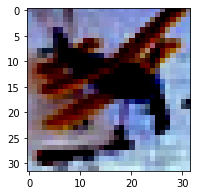

In [6]:
# Draw a Picture to see
n = 549
image = sampling[n]
label = trn_lab_imb[n]

print('image dtype:',image.dtype)
print('label dtype:',label.dtype)
print('data array shape:',data_arr.shape)
print('label array shape:',label_arr.shape)

image_cf = image.reshape(3,32,32)
print(image_cf.shape)

image_cl = np.moveaxis(image_cf, 0, -1)
print(image_cl.shape)

print(classes[int(label)])
plt.rcParams['figure.figsize'] = (3, 3)
plt.imshow(image_cl) 